<a href="https://colab.research.google.com/github/sumin2002/-/blob/main/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#오토인코더의 구현
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar100

#cifar100 읽어들이기 
(x_train,t_train),(x_test,t_test)=cifar100.load_data()
print(x_train.shape,x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


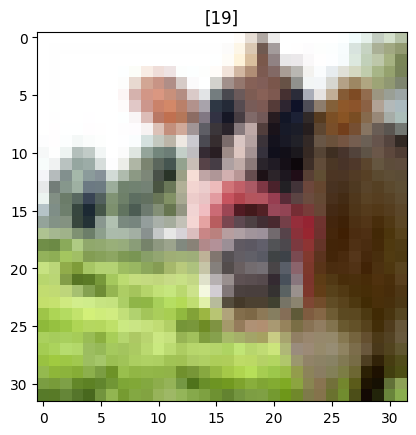

In [ ]:
# 각 픽셀의 값을 0-1 범위로 조정 
x_train = x_train/255
x_test = x_test/255

# 문자 이미지를 1개 표시
plt.imshow(x_train[0].reshape(32,32,3), cmap="gray")
plt.title(t_train[0])
plt.show()

In [ ]:
#1차원으로 변환 
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)
print("훈련용 데이터의 형태:",x_train.shape,"테스트용 데이터의 형태:",x_test.shape)

훈련용 데이터의 형태: (50000, 3072) 테스트용 데이터의 형태: (10000, 3072)


In [ ]:
# 설정
epochs=20
batch_size=128
n_in_out=3072 # 입출력층의 뉴런 수
n_mid=64 # 중간층의 뉴런 수

In [ ]:
# 오토인코더의 모델 구현
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input,Dense

# 각 층 
x=Input(shape=(n_in_out,)) # 입력
encoder=Dense(n_mid,activation="relu") # Encoder
decoder=Dense(n_in_out,activation="sigmoid") #Decoder

# 망 
h=encoder(x)
y=decoder(h)

# 오토인코더의 모델 
model_autoencoder=Model(x,y)
model_autoencoder.compile(optimizer="adam",loss="binary_crossentropy")
model_autoencoder.summary()
print()

# Encoder만의 모델 
model_encoder=Model(x,h)
model_encoder.summary()
print()

# Decoder만의 모델 
input_decoder=Input(shape=(n_mid,))
model_decoder=Model(input_decoder,decoder(input_decoder))
model_decoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 64)                196672    
_________________________________________________________________
dense_1 (Dense)              (None, 3072)              199680    
Total params: 396,352
Trainable params: 396,352
Non-trainable params: 0
_________________________________________________________________

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 64)                196672    
Total params: 196,672
Trainable param

In [ ]:
# 학습 
model_autoencoder.fit(x_train,x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test,x_test))

Epoch 1/20
391/391 [==============================] - 7s 6ms/step - loss: 0.6256 - val_loss: 0.6054
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 0.5994 - val_loss: 0.5926
Epoch 3/20
391/391 [==============================] - 2s 4ms/step - loss: 0.5895 - val_loss: 0.5852
Epoch 4/20
391/391 [==============================] - 2s 6ms/step - loss: 0.5835 - val_loss: 0.5823
Epoch 5/20
391/391 [==============================] - 2s 6ms/step - loss: 0.5803 - val_loss: 0.5793
Epoch 6/20
391/391 [==============================] - 2s 4ms/step - loss: 0.5786 - val_loss: 0.5780
Epoch 7/20
391/391 [==============================] - 2s 4ms/step - loss: 0.5781 - val_loss: 0.5774
Epoch 8/20
391/391 [==============================] - 2s 4ms/step - loss: 0.5779 - val_loss: 0.5785
Epoch 9/20
391/391 [==============================] - 2s 4ms/step - loss: 0.5776 - val_loss: 0.5803
Epoch 10/20
391/391 [==============================] - 2s 4ms/step - loss: 0.5774 - val_loss: 0.5773

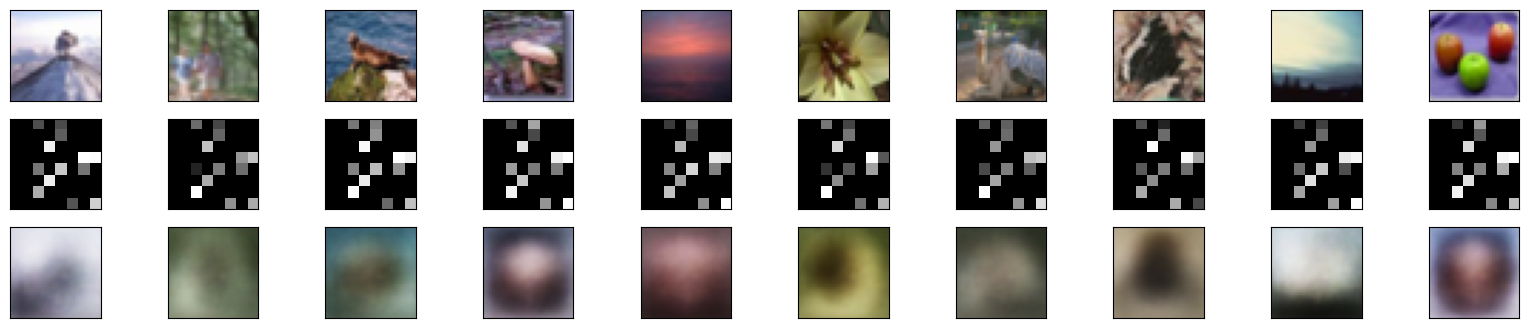

In [ ]:
# 생성 결과
encoded=model_encoder.predict(x_test)
decoded=model_decoder.predict(encoded)

n=10 # 표시할 이미지 수 
plt.figure(figsize=(20,4))
for i in range(n):
  # 입력 이미지 
  ax=plt.subplot(3,n,i+1)
  plt.imshow(x_test[i].reshape(32,32,3),cmap="Greys_r")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # 중간층의 출력 
  ax=plt.subplot(3,n,i+1+n)
  plt.imshow(encoded[i].reshape(8,8),cmap="Greys_r") # 이미지의 크기는 중간층의 뉴런 수에 맞춰서 변경한다. 
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  #출력 이미지 
  ax=plt.subplot(3,n,i+1+2*n)
  plt.imshow(decoded[i].reshape(32,32,3),cmap="Greys_r")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()